### KNN (K-Nearest Neighbors) Lab

In this lab we will attempt to classify, whether or not a wine is HIGH or LOW quality. This is a classification task since we will attempt to discrimnate between these two options.  To do so, we will take as input features of each wine and previous labels of HIGH or LOW quality.

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline


# Load in the dataset
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


#### Classifying high quality wines
- In this dataset, `quality` is a numeric column, if we were performing regression, we could predict this value.
- Since we are performing classification, we will predict `high_quality` which is 1 or 0, a binary label.
- What is the baseline accuracy that we should attempt to beat?

In [3]:
pd.crosstab(df['quality'], df['high_quality'])

high_quality,0.0,1.0
quality,,
3,30,0
4,216,0
5,2138,0
6,2836,0
7,0,1079
8,0,193
9,0,5


In [4]:
df['high_quality'].describe()

count    6497.000000
mean        0.196552
std         0.397421
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: high_quality, dtype: float64

#### What features are important to predict high quality wines?
- Let's explore the dataset

Let's do a correlation table!

In [5]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.049447
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.151714
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.054444
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.161781
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.014767
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,-0.051226
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.275441
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,0.028149
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,0.033971


This just gets the row for high quality 

In [6]:
df.corr().loc[:, 'high_quality']

fixed_acidity          -0.049447
volatile_acidity       -0.151714
citric_acid             0.054444
residual_sugar         -0.063992
chlorides              -0.161781
free_sulfur_dioxide     0.014767
total_sulfur_dioxide   -0.051226
density                -0.275441
pH                      0.028149
sulphates               0.033971
alcohol                 0.390486
quality                 0.759360
is_red                 -0.087479
high_quality            1.000000
Name: high_quality, dtype: float64

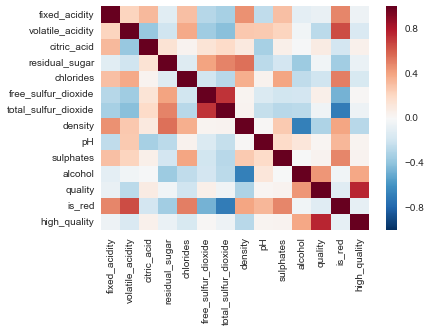

In [7]:
sns.heatmap(df.corr())

#### Build K-Nearest Neighbors model to predict whether or not a wine is high quality
- Select features you think will be predictive of high quality wines
- Scale the dataset (remember, this is so that each variable contributes equally to the distance computation)
- Evaluate the accuracy of your model using cross-validation
- Evaluate different values of `n` to see how the number of neighbors affects the classification accuracy

In [9]:
features_i_think_are_good = ['volatile_acidity', 'chlorides', 'density', 'alcohol']
good_features = df[features_i_think_are_good]

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [15]:
SS = StandardScaler()
SS.fit_transform(good_features)[0:5]

array([[ 2.18883292,  0.56995782,  1.03499282, -0.91546416],
       [ 3.28223494,  1.1979747 ,  0.70148631, -0.58006813],
       [ 2.55330026,  1.02669737,  0.76818761, -0.58006813],
       [-0.36243847,  0.54141159,  1.10169412, -0.58006813],
       [ 2.18883292,  0.56995782,  1.03499282, -0.91546416]])

In [16]:
good_features.head()

,volatile_acidity,chlorides,density,alcohol
0,0.70,0.076,0.9978,9.4
1,0.88,0.098,0.9968,9.8
2,0.76,0.092,0.9970,9.8
3,0.28,0.075,0.9980,9.8
4,0.70,0.076,0.9978,9.4


In [20]:
knn = KNeighborsClassifier(n_neighbors=7)

In [21]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [40]:
y = df['high_quality']

In [41]:
x = SS.fit_transform(good_features)

In [26]:
print y, x

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 1.]
 [ 0.]] [[ 2.18883292  0.56995782  1.03499282 -0.91546416]
 [ 3.28223494  1.1979747   0.70148631 -0.58006813]
 [ 2.55330026  1.02669737  0.76818761 -0.58006813]
 ..., 
 [-0.6054167  -0.42915996 -0.71925142 -0.91546416]
 [-0.30169391 -0.97153818 -2.00325148  1.9354021 ]
 [-0.78765037 -1.02863062 -1.7631268   1.09691202]]


In [27]:
y.shape

(6497, 1)

In [28]:
x.shape

(6497, 4)

In [29]:
knn.fit(x, y)

/Users/richardharris/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [30]:
knn.score(x, y)

0.85978143758657843

In [31]:
from sklearn.cross_validation import cross_val_score

In [43]:
knn = KNeighborsClassifier(n_neighbors=7)


scores = cross_val_score(knn, x, y, cv=7)
print "Cross-validated scores:", scores

Cross-validated scores: [ 0.80516685  0.7255113   0.79332616  0.7887931   0.79310345  0.73570658
  0.78856526]


In [45]:
import numpy as np 
np.mean(scores)

0.77573895744134158

In [55]:
my_scores = {}

for n in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, x, y, cv=7)
    print 'For %s neighbors, %s average accuracy across 7-fold cv!' % (n, np.mean(scores))
    my_scores[n] = np.mean(scores)

For 1 neighbors, 0.745096732421 average accuracy across 7-fold cv!
For 2 neighbors, 0.776353889598 average accuracy across 7-fold cv!
For 3 neighbors, 0.754032440648 average accuracy across 7-fold cv!
For 4 neighbors, 0.782668457956 average accuracy across 7-fold cv!
For 5 neighbors, 0.76973774559 average accuracy across 7-fold cv!
For 6 neighbors, 0.781128883383 average accuracy across 7-fold cv!
For 7 neighbors, 0.775738957441 average accuracy across 7-fold cv!
For 8 neighbors, 0.792984164793 average accuracy across 7-fold cv!
For 9 neighbors, 0.786367355101 average accuracy across 7-fold cv!
For 10 neighbors, 0.795604813264 average accuracy across 7-fold cv!
For 11 neighbors, 0.786824201933 average accuracy across 7-fold cv!
For 12 neighbors, 0.794526229961 average accuracy across 7-fold cv!
For 13 neighbors, 0.792985325808 average accuracy across 7-fold cv!
For 14 neighbors, 0.796987793867 average accuracy across 7-fold cv!
For 15 neighbors, 0.792367239517 average accuracy across 7

In [50]:
my_scores

{1: 0.74509673242098651,
 2: 0.77635388959798901,
 3: 0.75403244064847463,
 4: 0.78266845795618223,
 5: 0.7697377455901836,
 6: 0.78112888338317354,
 7: 0.77573895744134158,
 8: 0.79298416479298395,
 9: 0.7863673551010415,
 10: 0.79560481326440236}

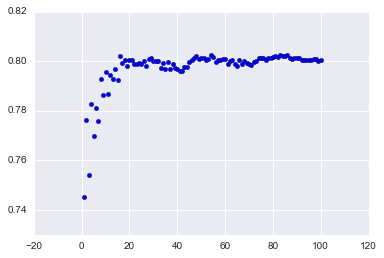

In [56]:
import matplotlib.pyplot as plt


plt.scatter(my_scores.keys(), my_scores.values())